In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from csc.workbench import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


In [2]:
batchSize = 200
path_to_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'
path_to_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mp-{batchSize}.json'

pomme = False

if pomme :
    input_signals_db = f'/home/gomes/synthetic-data/csc-signals-{batchSize}.json'
    input_mmpdf_db = f'/home/gomes/synthetic-data/csc-mmpdf-{batchSize}.json'
    input_mp_db = f'/home/gomes/synthetic-data/csc-mp-{batchSize}.json' 
    
else:
    input_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'
    input_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'
    input_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mp-{batchSize}.json'


In [3]:
workbench = CSCWorkbench(input_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [4]:
with open(input_signals_db, 'r') as f:
            output_data = json.load(f)
            signals_results = output_data['signals']

id0 = next(x['id'] for x in signals_results if x['sparsity'] == 4 and x['snr'] == 10)
signal_dict = next(x for x in signals_results if x['id'] == id0)


In [5]:
MAX_SPARSITY = 4
CONNECTIONS = 3
BRANCHES = 10
pos_err_threshold = 10      ## << POS_ERR_THRESHOLD >>
correlation_threshold = 0.8 ## << CORRELATION_THRESHOLD >>

In [6]:
DISSIMILARITY = 0.85        ## << DISSIMILARITY >>
print(f'\nDISSIMILARITY = {DISSIMILARITY}')

list_idx = [id0 + i for i in range(5)]
signal_dicts = [next(x for x in signals_results if x['id'] == id) for id in list_idx]
list_tp = []

for signal_dict in signal_dicts : 
    true_atoms = signal_dict['atoms']
    true_sparsity = len(true_atoms)
    
    mmp_sparVar_results = dictionary.mmpdfSparVarFromDict(
        signal_dict=signal_dict, 
        connections_level=CONNECTIONS,
        dissimilarity=DISSIMILARITY,
        nb_branches=BRANCHES,
        max_sparsity=MAX_SPARSITY,
        verbose=False
    )

    mmp_results = mmp_sparVar_results['results']
    mmp_dict_approx = mmp_results[true_sparsity - 1]
    approx_atoms = mmp_dict_approx['atoms']
    approx_path = mmp_dict_approx['path']

    print(f'\nID n°{signal_dict["id"]} ==> {approx_path}')
    tp = workbench.computeTruePositives(true_atoms, approx_atoms, pos_err_threshold, correlation_threshold, verbose=True)
    list_tp.append(tp)
    print(f' ==> True Positives : {tp}/{len(true_atoms)}')

print(f'\nMean TP score : {np.mean(list_tp)}')


DISSIMILARITY = 0.85

ID n°3200 ==> 2-1-1-1
    REAL x=5 b=0.025, y=0.034, sigma=7.314e-05   |  APPROX x=9 b=0.035, y=0.028, sigma=5.355e-05  ==> True  |  0.8938755954183711
    REAL x=206 b=0.045, y=0.032, sigma=6.630e-05   |  APPROX x=198 b=0.050, y=0.034, sigma=7.303e-05  ==> True  |  0.9039130776683946
    REAL x=12 b=0.040, y=0.020, sigma=3.422e-05   |  APPROX x=95 b=0.055, y=0.012, sigma=1.654e-05  ==> False  |  -0.21304150741929362
    REAL x=191 b=0.055, y=0.032, sigma=6.804e-05   |  APPROX x=105 b=0.035, y=0.010, sigma=1.252e-05  ==> False  |  -0.3278811225264645
 ==> True Positives : 2/4

ID n°3201 ==> 1-1-1-1
    REAL x=162 b=0.030, y=0.020, sigma=3.303e-05   |  APPROX x=143 b=0.035, y=0.014, sigma=2.043e-05  ==> False  |  0.17488549974811934
    REAL x=188 b=0.045, y=0.034, sigma=7.209e-05   |  APPROX x=185 b=0.050, y=0.028, sigma=5.595e-05  ==> True  |  0.9439128114991984
    REAL x=142 b=0.035, y=0.016, sigma=2.470e-05   |  APPROX x=143 b=0.045, y=0.010, sigma=1.258e-05 

In [7]:
DISSIMILARITY = 0.65        ## << DISSIMILARITY >>
print(f'\nDISSIMILARITY = {DISSIMILARITY}')

list_idx = [id0 + i for i in range(5)]
signal_dicts = [next(x for x in signals_results if x['id'] == id) for id in list_idx]
list_tp = []

for signal_dict in signal_dicts : 
    true_atoms = signal_dict['atoms']
    true_sparsity = len(true_atoms)
    
    mmp_sparVar_results = dictionary.mmpdfSparVarFromDict(
        signal_dict=signal_dict, 
        connections_level=CONNECTIONS,
        dissimilarity=DISSIMILARITY,
        nb_branches=BRANCHES,
        max_sparsity=MAX_SPARSITY,
        verbose=False
    )

    mmp_results = mmp_sparVar_results['results']
    mmp_dict_approx = mmp_results[true_sparsity - 1]
    approx_atoms = mmp_dict_approx['atoms']
    approx_path = mmp_dict_approx['path']

    print(f'\nID n°{signal_dict["id"]} ==> {approx_path}')
    tp = workbench.computeTruePositives(true_atoms, approx_atoms, pos_err_threshold, correlation_threshold, verbose=True)
    list_tp.append(tp)
    print(f' ==> True Positives : {tp}/{len(true_atoms)}')

print(f'\nMean TP score : {np.mean(list_tp)}')


DISSIMILARITY = 0.65

ID n°3200 ==> 2-1-1-1
    REAL x=5 b=0.025, y=0.034, sigma=7.314e-05   |  APPROX x=9 b=0.035, y=0.028, sigma=5.355e-05  ==> True  |  0.8938755954183711
    REAL x=206 b=0.045, y=0.032, sigma=6.630e-05   |  APPROX x=198 b=0.050, y=0.034, sigma=7.303e-05  ==> True  |  0.9039130776683946
    REAL x=12 b=0.040, y=0.020, sigma=3.422e-05   |  APPROX x=95 b=0.055, y=0.012, sigma=1.654e-05  ==> False  |  -0.21304150741929362
    REAL x=191 b=0.055, y=0.032, sigma=6.804e-05   |  APPROX x=105 b=0.035, y=0.010, sigma=1.252e-05  ==> False  |  -0.3278811225264645
 ==> True Positives : 2/4

ID n°3201 ==> 1-1-1-1
    REAL x=162 b=0.030, y=0.020, sigma=3.303e-05   |  APPROX x=143 b=0.035, y=0.014, sigma=2.043e-05  ==> False  |  0.17488549974811934
    REAL x=188 b=0.045, y=0.034, sigma=7.209e-05   |  APPROX x=185 b=0.050, y=0.028, sigma=5.595e-05  ==> True  |  0.9439128114991984
    REAL x=142 b=0.035, y=0.016, sigma=2.470e-05   |  APPROX x=143 b=0.045, y=0.010, sigma=1.258e-05 

In [8]:
DISSIMILARITY = 0.45        ## << DISSIMILARITY >>
print(f'\nDISSIMILARITY = {DISSIMILARITY}')

list_idx = [id0 + i for i in range(5)]
signal_dicts = [next(x for x in signals_results if x['id'] == id) for id in list_idx]
list_tp = []

for signal_dict in signal_dicts : 
    true_atoms = signal_dict['atoms']
    true_sparsity = len(true_atoms)
    
    mmp_sparVar_results = dictionary.mmpdfSparVarFromDict(
        signal_dict=signal_dict, 
        connections_level=CONNECTIONS,
        dissimilarity=DISSIMILARITY,
        nb_branches=BRANCHES,
        max_sparsity=MAX_SPARSITY,
        verbose=False
    )

    mmp_results = mmp_sparVar_results['results']
    mmp_dict_approx = mmp_results[true_sparsity - 1]
    approx_atoms = mmp_dict_approx['atoms']
    approx_path = mmp_dict_approx['path']

    print(f'\nID n°{signal_dict["id"]} ==> {approx_path}')
    tp = workbench.computeTruePositives(true_atoms, approx_atoms, pos_err_threshold, correlation_threshold, verbose=True)
    list_tp.append(tp)
    print(f' ==> True Positives : {tp}/{len(true_atoms)}')

print(f'\nMean TP score : {np.mean(list_tp)}')


DISSIMILARITY = 0.45

ID n°3200 ==> 2-1-1-1
    REAL x=5 b=0.025, y=0.034, sigma=7.314e-05   |  APPROX x=9 b=0.035, y=0.028, sigma=5.355e-05  ==> True  |  0.8938755954183711
    REAL x=206 b=0.045, y=0.032, sigma=6.630e-05   |  APPROX x=198 b=0.050, y=0.034, sigma=7.303e-05  ==> True  |  0.9039130776683946
    REAL x=12 b=0.040, y=0.020, sigma=3.422e-05   |  APPROX x=95 b=0.055, y=0.012, sigma=1.654e-05  ==> False  |  -0.21304150741929362
    REAL x=191 b=0.055, y=0.032, sigma=6.804e-05   |  APPROX x=105 b=0.035, y=0.010, sigma=1.252e-05  ==> False  |  -0.3278811225264645
 ==> True Positives : 2/4

ID n°3201 ==> 1-1-1-1
    REAL x=162 b=0.030, y=0.020, sigma=3.303e-05   |  APPROX x=143 b=0.035, y=0.014, sigma=2.043e-05  ==> False  |  0.17488549974811934
    REAL x=188 b=0.045, y=0.034, sigma=7.209e-05   |  APPROX x=185 b=0.050, y=0.028, sigma=5.595e-05  ==> True  |  0.9439128114991984
    REAL x=142 b=0.035, y=0.016, sigma=2.470e-05   |  APPROX x=143 b=0.045, y=0.010, sigma=1.258e-05 

In [9]:
DISSIMILARITY = 0.25        ## << DISSIMILARITY >>
print(f'\nDISSIMILARITY = {DISSIMILARITY}')

list_idx = [id0 + i for i in range(5)]
signal_dicts = [next(x for x in signals_results if x['id'] == id) for id in list_idx]
list_tp = []

for signal_dict in signal_dicts : 
    true_atoms = signal_dict['atoms']
    true_sparsity = len(true_atoms)
    
    mmp_sparVar_results = dictionary.mmpdfSparVarFromDict(
        signal_dict=signal_dict, 
        connections_level=CONNECTIONS,
        dissimilarity=DISSIMILARITY,
        nb_branches=BRANCHES,
        max_sparsity=MAX_SPARSITY,
        verbose=False
    )

    mmp_results = mmp_sparVar_results['results']
    mmp_dict_approx = mmp_results[true_sparsity - 1]
    approx_atoms = mmp_dict_approx['atoms']
    approx_path = mmp_dict_approx['path']

    print(f'\nID n°{signal_dict["id"]} ==> {approx_path}')
    tp = workbench.computeTruePositives(true_atoms, approx_atoms, pos_err_threshold, correlation_threshold, verbose=True)
    list_tp.append(tp)
    print(f' ==> True Positives : {tp}/{len(true_atoms)}')

print(f'\nMean TP score : {np.mean(list_tp)}')


DISSIMILARITY = 0.25

ID n°3200 ==> 2-1-1-1
    REAL x=5 b=0.025, y=0.034, sigma=7.314e-05   |  APPROX x=9 b=0.035, y=0.028, sigma=5.355e-05  ==> True  |  0.8938755954183711
    REAL x=206 b=0.045, y=0.032, sigma=6.630e-05   |  APPROX x=198 b=0.050, y=0.034, sigma=7.303e-05  ==> True  |  0.9039130776683946
    REAL x=12 b=0.040, y=0.020, sigma=3.422e-05   |  APPROX x=95 b=0.055, y=0.012, sigma=1.654e-05  ==> False  |  -0.21304150741929362
    REAL x=191 b=0.055, y=0.032, sigma=6.804e-05   |  APPROX x=105 b=0.035, y=0.010, sigma=1.252e-05  ==> False  |  -0.3278811225264645
 ==> True Positives : 2/4

ID n°3201 ==> 1-1-1-1
    REAL x=162 b=0.030, y=0.020, sigma=3.303e-05   |  APPROX x=143 b=0.035, y=0.014, sigma=2.043e-05  ==> False  |  0.17488549974811934
    REAL x=188 b=0.045, y=0.034, sigma=7.209e-05   |  APPROX x=185 b=0.050, y=0.028, sigma=5.595e-05  ==> True  |  0.9439128114991984
    REAL x=142 b=0.035, y=0.016, sigma=2.470e-05   |  APPROX x=143 b=0.045, y=0.010, sigma=1.258e-05 

In [10]:
DISSIMILARITY = 0.10        ## << DISSIMILARITY >>
print(f'\nDISSIMILARITY = {DISSIMILARITY}')

list_idx = [id0 + i for i in range(5)]
signal_dicts = [next(x for x in signals_results if x['id'] == id) for id in list_idx]
list_tp = []

for signal_dict in signal_dicts : 
    true_atoms = signal_dict['atoms']
    true_sparsity = len(true_atoms)
    
    mmp_sparVar_results = dictionary.mmpdfSparVarFromDict(
        signal_dict=signal_dict, 
        connections_level=CONNECTIONS,
        dissimilarity=DISSIMILARITY,
        nb_branches=BRANCHES,
        max_sparsity=MAX_SPARSITY,
        verbose=False
    )

    mmp_results = mmp_sparVar_results['results']
    mmp_dict_approx = mmp_results[true_sparsity - 1]
    approx_atoms = mmp_dict_approx['atoms']
    approx_path = mmp_dict_approx['path']

    print(f'\nID n°{signal_dict["id"]} ==> {approx_path}')
    tp = workbench.computeTruePositives(true_atoms, approx_atoms, pos_err_threshold, correlation_threshold, verbose=True)
    list_tp.append(tp)
    print(f' ==> True Positives : {tp}/{len(true_atoms)}')

print(f'\nMean TP score : {np.mean(list_tp)}')


DISSIMILARITY = 0.1

ID n°3200 ==> 2-1-1-1
    REAL x=5 b=0.025, y=0.034, sigma=7.314e-05   |  APPROX x=9 b=0.035, y=0.028, sigma=5.355e-05  ==> True  |  0.8938755954183711
    REAL x=206 b=0.045, y=0.032, sigma=6.630e-05   |  APPROX x=198 b=0.050, y=0.034, sigma=7.303e-05  ==> True  |  0.9039130776683946
    REAL x=12 b=0.040, y=0.020, sigma=3.422e-05   |  APPROX x=95 b=0.055, y=0.012, sigma=1.654e-05  ==> False  |  -0.21304150741929362
    REAL x=191 b=0.055, y=0.032, sigma=6.804e-05   |  APPROX x=105 b=0.035, y=0.010, sigma=1.252e-05  ==> False  |  -0.3278811225264645
 ==> True Positives : 2/4

ID n°3201 ==> 1-1-1-1
    REAL x=162 b=0.030, y=0.020, sigma=3.303e-05   |  APPROX x=143 b=0.035, y=0.014, sigma=2.043e-05  ==> False  |  0.17488549974811934
    REAL x=188 b=0.045, y=0.034, sigma=7.209e-05   |  APPROX x=185 b=0.050, y=0.028, sigma=5.595e-05  ==> True  |  0.9439128114991984
    REAL x=142 b=0.035, y=0.016, sigma=2.470e-05   |  APPROX x=143 b=0.045, y=0.010, sigma=1.258e-05  

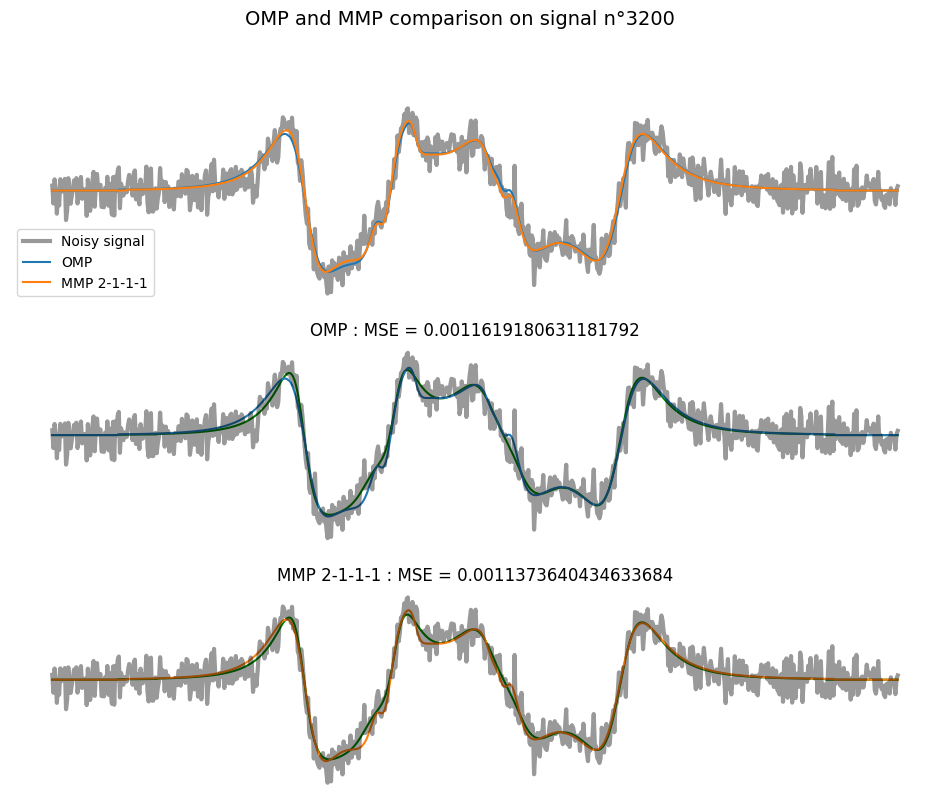

In [11]:
workbench.plotMMPComparison(path_to_mmpdf_db, id0)

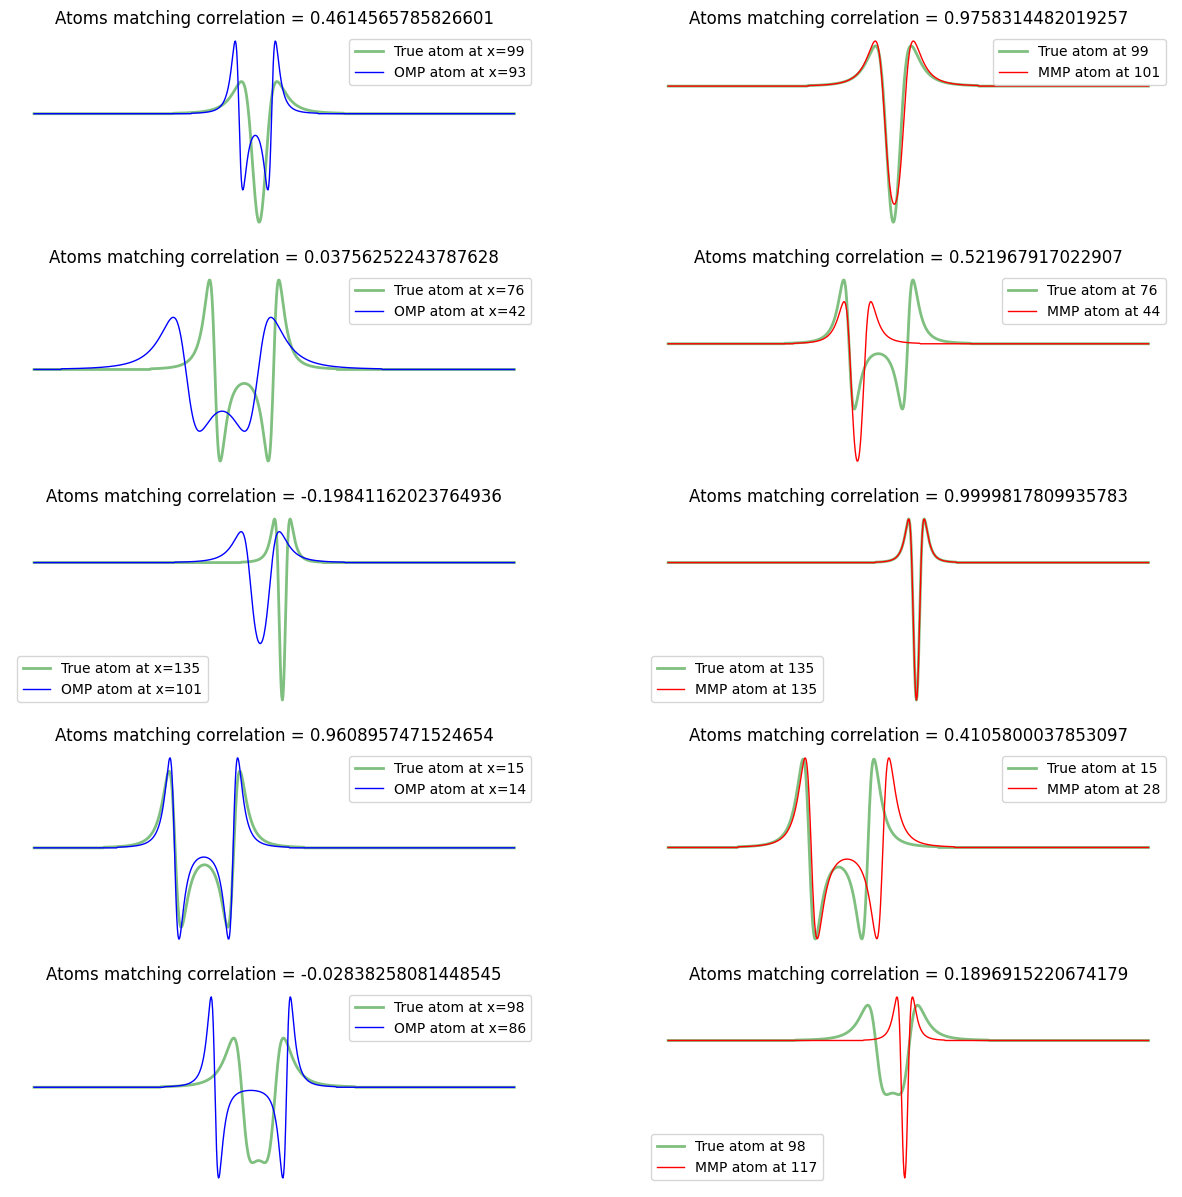

In [12]:
workbench.plotAtomsPosisitonMatchingFromId(mmpdf_db_path=path_to_mmpdf_db, id=3400)